In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Import Data
data = pd.read_csv("FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#Data exploration and summurization about the data
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#Selecting some features out of the data
newData = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
newData.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


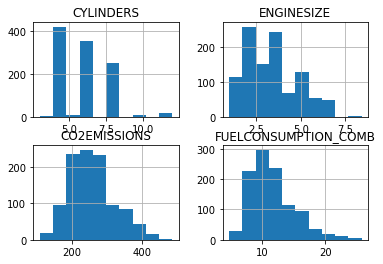

In [5]:
#Draw the histograms of the data attributes of newData
visualize = newData[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
visualize.hist()
plt.show()

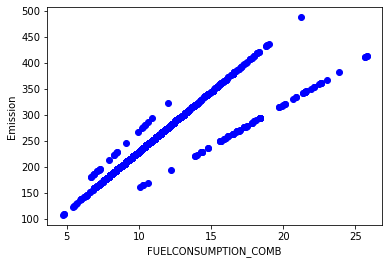

In [6]:
#Scatter plot of FUELCONSUMPTION_COMB Vs CO2_EMISSIONS
plt.scatter(newData.FUELCONSUMPTION_COMB, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

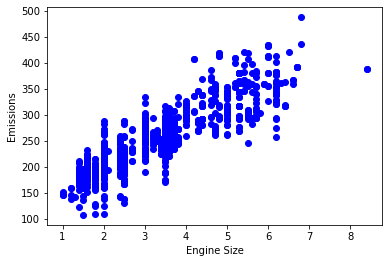

In [7]:
#Scatter plot of ENGINESIZE Vs CO2EMISSIONS
plt.scatter(newData.ENGINESIZE, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

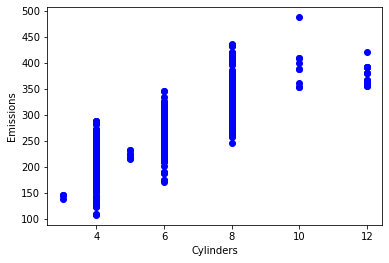

In [8]:
#Scatter plot of CYLINEDRS Vs CO2EMISSIONS
plt.scatter(newData.CYLINDERS, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

In [10]:
#Creating a train and test dataset
msk = np.random.rand(len(data)) < 0.8
train = newData[msk]
test = newData[~msk]

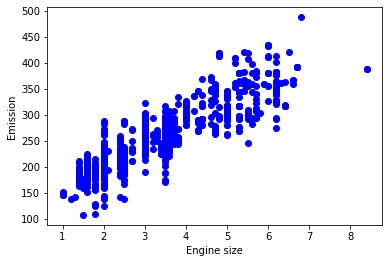

In [11]:
#Plot the training dataset
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [14]:
#MODELING
from sklearn import linear_model
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x, train_y)
#THE COEFFICIENTS
print('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficients:  [[38.9486952]]
Intercept:  [125.98667926]


Text(0, 0.5, 'Emission')

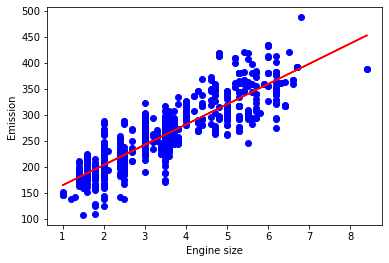

In [17]:
#PLOT THE OUTPUTS
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regression.coef_ * train_x + regression.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [18]:
#EVALUATION
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regression.predict(test_x)

print("MEAN ABSOLUTE ERROR(MSE) : %.2f" %np.mean(np.absolute(test_y_ - test_y)))
print("RESIDUAL SUM OF SQUARES: %.2f" %np.mean((test_y_ - test_y)**2))
print("R2 - score: %.2f" % r2_score(test_y , test_y_))

MEAN ABSOLUTE ERROR(MSE) : 25.36
RESIDUAL SUM OF SQUARES: 1122.93
R2 - score: 0.72


In [19]:
#EXERCISE SOLUTION

In [21]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

In [22]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
#Print the coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[16.17550657]]
Intercept:  [69.28970553]


Text(0, 0.5, 'Emission')

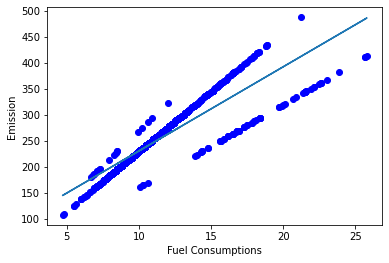

In [25]:
#PLOT THE OUTPUTS
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_ * train_x + regr.intercept_)
plt.xlabel("Fuel Consumptions")
plt.ylabel("Emission")

In [26]:
#Predictions
predictions = regr.predict(test_x)

In [27]:
#Mean Absolute Error
print("Mean Absloute Error (MSE): %.2f" %np.mean(np.absolute(predictions - test_y)))

Mean Absloute Error (MSE): 19.76
